Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[George McNinch](http://gmcninch.math.tufts.edu) <george.mcninch@tufts.edu>  
*Fall 2020*

Course material (Week 10): Monte-Carlo integration
----------------------------------------------------------------

Monte-Carlo integration
=======================

We want to consider examples for which studying random processes can help solve apparently non-random problems!

Here is a first example:

Example: Buffon's Needle
-------------------------

Consider an array of parallel lines (say, on a piece of paper -- though we'll consider the grid to "go on forever").

We suppose that the distance between each pair of consecutive parallel lines is constant. In fact, we normalize
our measures and suppose that this distance is 1 ``unit``.

Now consider a needle also of length 1 ``unit``. We drop this needle on the page and wonder: with what probability does it cross one of the lines??

Graphical demo
---------------

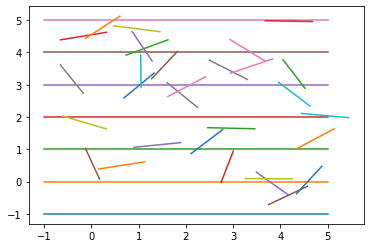

In [1]:
import numpy as np
import matplotlib.pyplot as mp


from numpy.random import default_rng
rng = default_rng()

def dist(x,y,x1,y1):
    return np.sqrt((x-x1)**2 + (y-y1)**2)

def needle_drop(ax):
    x0 = rng.random()*5.5 - .5
    y0 = rng.random()*5.5 - .5
    theta = np.pi*rng.random() - np.pi/2
        
    x = np.array([x0,x0]) + (1/2)*np.array([np.cos(theta),(-1)*np.cos(theta)])
    y = np.array([y0,y0]) + (1/2)*np.array([np.sin(theta),(-1)*np.sin(theta)])
    
    ax.plot(x,y)    

def needle_demo(n=20):
    fig,ax = mp.subplots()

    x = np.linspace(-1,5,5)

    def hline(ht):
        ax.plot(x,np.array([ht for i in x]))

    for i in range(-1,6):
        hline(i)
        
    for i in range(n):
        needle_drop(ax)
        
needle_demo(n=30)

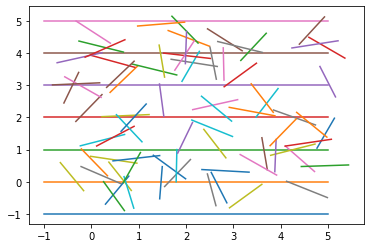

In [2]:
needle_demo(n=75)

Random variables
----------------

If you inspect the code for the demo, you'll see that for each needle, we've randomly
chosen the midpoint of the needle, and the angle $\theta$ that the needle makes with one of the parallel lines.

The coordinates of the midpoint are important for drawing the diagram, but for the purposes
of counting the needles which cross the lines, the important stastic is the *distance* of the midpoint from the nearest line.

For a needle drop, the distance $D$ from the nearest line is a uniformly distributed random variable assuming the values $0 \le D \le \dfrac{1}{2}$.

And the angle $\theta$ that the needle makes with one of parallel lines is a uniformly distributed random variable assuming the values $0 \le \theta \le \pi$.


Uniformly distributed ??
------------------------
We need to understand the term *uniformly distributed*, at least in this example.

To say that $D$ is uniformly distributed means that for  $0 \le a < b \le \dfrac{1}{2}$ we have

$$P(a \le D \le b) = \int_a^b 2dx$$

which guarantees that $P\left(0 < D < \dfrac{1}{2}\right) = 1$.

And to say that $\theta$ is uniformly distributed means that for $0 \le \alpha < \beta \le \pi$ we have

$$P(\alpha < \theta \le \beta) = \dfrac{1}{\pi}\int_\alpha^\beta d\theta$$

which guarantees that 

$$P\left( 0 \le \theta \le \pi \right) = 1.$$

Roughly speaking, a random variable $Z$ is "uniformly distributed" means that the probability distribution function is constant on the "relevant interval" $[A,B]$, and the constant is chosen to guaranteed that the probability satisfies $P(A\le Z \le B) = 1$.

Independent random variables
-----------------------------

For our needle drop, we assume that the position is *independent* from the angle.

A consequence of this independence is that we can calculate the probability that $(D,\theta)$ satisfies certain conditions by using a double-integral.

Let's make this condition more precise. Consider the condtions: $\theta$ satisfies $0 \le \theta \le \dfrac{\pi}{4}$ and $D$ satisfies $0 \le D \le \dfrac{1}{4}$. With what probability does a random needle satisfy this condition??

Well, since $D$ and $\theta$ are independent, we can calculate this using

$$P\left(0 \le D \le \dfrac{1}{4}, 0 \le \theta \le \dfrac{\pi}{4}\right) = 
\dfrac{2}{\pi}\int_0^{1/4} \int_0^{\pi/4}  d\theta dD  = \dfrac{1}{8}$$

Condition for a needle crossing
-------------------------------

Let's look at a diagram where $D = \dfrac{1}{2}$.

We consider $\theta = \dfrac{\pi}{4}$ and $\dfrac{\pi}{7}$. In the first case,
we see that the needle will cross the line, and in the second case it will not cross.

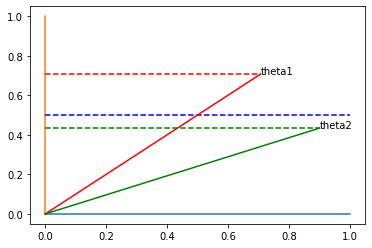

In [107]:
fig,ax = mp.subplots()
ax.plot([0,1],[0,0])
ax.plot([0,0],[0,1])

theta1 = np.pi/4
theta2 = np.pi/7

ax.plot([0,1],[.5,.5],"b--")

def f(theta,col,var):
    ax.plot([0,np.cos(theta)],[0,np.sin(theta)],col)
    ax.plot([0,np.cos(theta)],[np.sin(theta),np.sin(theta)],col+"--")
    ax.annotate(var,(np.cos(theta),np.sin(theta)))
    
f(theta1,"r","theta1")
f(theta2,"g","theta2")

To analyze the general situation,
suppose that the needle drops with midpoint $(x_0,y_0)$ at a distance $0 < D < \dfrac{1}{2}$ from one of the lines. Changinging coordinates, we may as well suppose that $y_0 = -D$ and
that the nearest line occurs at $y = 0$.

The "positive vertical component" of the vector at $(x_0,y_0)$ determined by the needle is equal to 

$$\dfrac{1}{2}(\cos(\theta),\sin(\theta))$$

Thus, the needle will intersect the line if and only if $\sin(\theta) > D$.